# Simple MNIST Digit Classifier Neural Network
*(Made in Python from Scratch)*

### Import numpy, pandas, matlplotlib (only libraries* we will be using)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm#used for showing progress bar during training

### Import MNIST Dataset
*- Traning Dataset: https://www.kaggle.com/competitions/digit-recognizer/data?select=train.csv*

*- Testing Dataset: https://www.kaggle.com/competitions/digit-recognizer/data?select=test.csv*

In [42]:
trainingData = pd.read_csv('Data/digit-recognizer/train.csv')
trainingData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert to numpy arrays, split data

In [43]:
trainingData = np.array(trainingData) #convert pandas dataframe to numpy array so we can do linear algebra
numExamples, numFeatures = trainingData.shape#rows, columns

np.random.shuffle(trainingData)#shuffle and split into mini batches for computational speed up

# Split into dev and train sets
devData = trainingData[0:1000].T#x
trainData = trainingData[1000:].T#y

# Development set
devLabels = devData[0]
devImages = devData[1:numFeatures]    

# Training set
trainLabels = trainData[0]
trainImages = trainData[1:numFeatures]


### Initialise Neural Network Parameters

In [44]:
def initaliseParamaters():
    #global weight2
    weight1 = np.random.rand(10,784)-0.5#generate random values between -0.5 and 0.5 bias
    weight2 = np.random.rand(10,10)-0.5
    bias1 = np.random.rand(10,1)-0.5
    bias2 = np.random.rand(10,1)-0.5
    return weight1, bias1, weight2, bias2

### ReLu (Rectified Linear Unit) Actitvation Function
$
\text{ReLU}(x) = \max(0, x)
$


In [45]:
def ReLuFunc(Z):#easier to train that sigmoid activatin function
    return np.maximum(0, Z)#go through each element in Z and if it is greater than 0 then z else return 0

### Derivative ReLu (Rectified Linear Unit) Activation Function
$
\text{ReLU}'(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\ 
1 & \text{if } x > 0 
\end{cases}
$


In [ ]:
def ReLuFuncDeriv(Z):
    return Z > 0

### SoftMax Activation Function
$
\text{softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad
$


In [47]:
def softMaxFunc(Z):#softmax activation function formula
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)


### Forward Propagation

In [48]:
def forwardPropagation(weight1, bias1, weight2, bias2, X):
    Z1 = weight1.dot(X) + bias1
    A1 = ReLuFunc(Z1)
    Z2 = weight2.dot(A1) + bias2
    A2 = softMaxFunc(Z2)
    return Z1, A1, Z2, A2

### One-Hot Encoding
$
\text{one\_hot}(i, K) = 
\begin{bmatrix}
0 \\
0 \\
\vdots \\
1 \\
\vdots \\
0
\end{bmatrix} \quad \text{where } 1 \text{ is the index } i \text{ and } K \text{ is total number of classes}
$


In [49]:
def oneHotEncode(Y):
    oneHotYMatrix = np.zeros((Y.size, Y.max()+1))#creates matrix array of zeros with 10 output classes 0 to 9
    oneHotYMatrix[np.arange(Y.size),Y] = 1#goes through each row specified by the label Y and sets it to 1
    oneHotYMatrix = oneHotYMatrix.T#flip through transpose so each coloumn is example instead of row
    return oneHotYMatrix

### Backpropagation

In [50]:
def backPropagation(Z1, A1, Z2, A2, weight2, X, Y):
    oneHotYMatrix = oneHotEncode(Y)
    m = Y.size
    dZ2 = A2 - oneHotYMatrix
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = weight2.T.dot(dZ2) * ReLuFuncDeriv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2


### Update Paramaters (rate of learning)

In [51]:
def updateParameters(weight1, bias1, weight2, bias2, dW1, dB1, dW2, dB2, α):
    weight1 = weight1 - α*dW1
    weight2 = weight2 - α * dW2
    bias2 = bias2 - α*dB2
    bias1 = bias1 - α*dB1
    return weight1, bias1, weight2, bias2

### Fetch Predictitons & Accuracy

In [52]:
def fetchPredictions(A2):
    return np.argmax(A2, 0)

def fetchAccuracy(prediction, Y):
    print(prediction, Y)
    return np.sum(prediction == Y) / (Y.size)

### Gradient Descent

In [53]:
trainImages = trainImages / 255.0
devImages   = devImages   / 255.0

def gradientDescent(X, Y, epochs, α):
    weight1, bias1, weight2, bias2 = initaliseParamaters()
    for epoch in tqdm(range(epochs), desc="Training Progress"):
        Z1, A1, Z2, A2 = forwardPropagation(weight1, bias1, weight2, bias2, X)
        dW1, dB1, dW2, dB2 = backPropagation(Z1, A1, Z2, A2, weight2, X, Y)
        weight1, bias1, weight2, bias2 = updateParameters(weight1, bias1, weight2, bias2, dW1, dB1, dW2, dB2, α)
        if epoch % 10 == 0:#every 10th interation
            accuracy = fetchAccuracy(fetchPredictions(A2), Y)
            #print(f"Epoch: {epoch}")
            #print("Probability Accuracy: ", fetchAccuracy(fetchPredictions(A2), Y))
            tqdm.write(f"Epoch {epoch} - Probability Accuracy: {accuracy}")
    return weight1, bias1, weight2, bias2
    

In [54]:
weight1, bias1, weight2, bias2 = gradientDescent(trainImages, trainLabels, 1000, 0.1)#iterates 1000 times which reuslts in an improved accuacy of around 88% (before it was 9% then 11%...)


Training Progress:   0%|          | 1/1000 [00:00<03:10,  5.26it/s]

[9 2 1 ... 2 2 5] [9 8 6 ... 9 0 4]
Epoch 0 - Probability Accuracy: 0.11197560975609756


Training Progress:   1%|          | 12/1000 [00:01<01:32, 10.72it/s]

[9 5 6 ... 3 5 5] [9 8 6 ... 9 0 4]
Epoch 10 - Probability Accuracy: 0.20009756097560977


Training Progress:   2%|▏         | 22/1000 [00:02<02:18,  7.07it/s]

[9 8 6 ... 3 0 8] [9 8 6 ... 9 0 4]
Epoch 20 - Probability Accuracy: 0.29517073170731706


Training Progress:   3%|▎         | 31/1000 [00:04<02:18,  6.98it/s]

[9 8 6 ... 3 0 8] [9 8 6 ... 9 0 4]
Epoch 30 - Probability Accuracy: 0.3809268292682927


Training Progress:   4%|▍         | 43/1000 [00:05<01:36,  9.90it/s]

[9 8 6 ... 9 0 8] [9 8 6 ... 9 0 4]
Epoch 40 - Probability Accuracy: 0.4542439024390244


Training Progress:   5%|▌         | 53/1000 [00:07<01:55,  8.18it/s]

[9 8 6 ... 9 0 8] [9 8 6 ... 9 0 4]
Epoch 50 - Probability Accuracy: 0.5144390243902439


Training Progress:   6%|▌         | 61/1000 [00:07<02:04,  7.51it/s]

[9 8 6 ... 9 0 8] [9 8 6 ... 9 0 4]
Epoch 60 - Probability Accuracy: 0.5617560975609757


Training Progress:   7%|▋         | 72/1000 [00:09<02:24,  6.42it/s]

[9 8 6 ... 9 0 8] [9 8 6 ... 9 0 4]
Epoch 70 - Probability Accuracy: 0.6004878048780488


Training Progress:   8%|▊         | 82/1000 [00:10<02:08,  7.15it/s]

[4 8 6 ... 9 0 8] [9 8 6 ... 9 0 4]
Epoch 80 - Probability Accuracy: 0.631390243902439


Training Progress:   9%|▉         | 93/1000 [00:11<01:08, 13.28it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 90 - Probability Accuracy: 0.6560487804878049


Training Progress:  10%|█         | 101/1000 [00:12<01:59,  7.51it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 100 - Probability Accuracy: 0.6732682926829269


Training Progress:  11%|█         | 112/1000 [00:13<01:23, 10.62it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 110 - Probability Accuracy: 0.6890243902439024


Training Progress:  12%|█▏        | 121/1000 [00:15<03:23,  4.31it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 120 - Probability Accuracy: 0.7032926829268292


Training Progress:  13%|█▎        | 133/1000 [00:16<01:20, 10.74it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 130 - Probability Accuracy: 0.7147560975609756


Training Progress:  14%|█▍        | 144/1000 [00:17<01:12, 11.78it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 140 - Probability Accuracy: 0.7256341463414634


Training Progress:  15%|█▌        | 154/1000 [00:18<01:01, 13.78it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 150 - Probability Accuracy: 0.734780487804878


Training Progress:  16%|█▌        | 162/1000 [00:19<01:11, 11.67it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 160 - Probability Accuracy: 0.7429512195121951


Training Progress:  17%|█▋        | 172/1000 [00:20<01:09, 11.90it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 170 - Probability Accuracy: 0.75


Training Progress:  18%|█▊        | 182/1000 [00:21<01:11, 11.37it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 180 - Probability Accuracy: 0.7564390243902439


Training Progress:  19%|█▉        | 193/1000 [00:22<01:23,  9.69it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 190 - Probability Accuracy: 0.7625609756097561


Training Progress:  20%|██        | 203/1000 [00:23<01:11, 11.15it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 200 - Probability Accuracy: 0.7678048780487805


Training Progress:  21%|██        | 212/1000 [00:25<03:24,  3.86it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 210 - Probability Accuracy: 0.7723414634146342


Training Progress:  22%|██▏       | 221/1000 [00:27<01:58,  6.60it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 220 - Probability Accuracy: 0.777609756097561


Training Progress:  23%|██▎       | 233/1000 [00:28<01:08, 11.21it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 230 - Probability Accuracy: 0.7819024390243903


Training Progress:  24%|██▍       | 243/1000 [00:29<00:53, 14.06it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 240 - Probability Accuracy: 0.786


Training Progress:  25%|██▌       | 251/1000 [00:30<01:00, 12.34it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 250 - Probability Accuracy: 0.7901463414634147


Training Progress:  26%|██▋       | 263/1000 [00:31<01:03, 11.55it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 260 - Probability Accuracy: 0.7939268292682927


Training Progress:  27%|██▋       | 273/1000 [00:31<00:51, 14.04it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 270 - Probability Accuracy: 0.7979268292682927


Training Progress:  28%|██▊       | 283/1000 [00:32<00:48, 14.92it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 280 - Probability Accuracy: 0.8016341463414635


Training Progress:  29%|██▉       | 293/1000 [00:33<00:54, 12.94it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 290 - Probability Accuracy: 0.8046829268292683


Training Progress:  30%|███       | 303/1000 [00:34<00:59, 11.80it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 300 - Probability Accuracy: 0.8081463414634147


Training Progress:  31%|███▏      | 313/1000 [00:35<00:49, 13.77it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 310 - Probability Accuracy: 0.8113902439024391


Training Progress:  32%|███▏      | 323/1000 [00:35<00:49, 13.56it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 320 - Probability Accuracy: 0.8143170731707317


Training Progress:  33%|███▎      | 333/1000 [00:36<00:51, 12.95it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 330 - Probability Accuracy: 0.8172195121951219


Training Progress:  34%|███▍      | 343/1000 [00:37<01:00, 10.81it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 340 - Probability Accuracy: 0.8196585365853658


Training Progress:  35%|███▌      | 353/1000 [00:38<01:04, 10.03it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 350 - Probability Accuracy: 0.8219268292682926


Training Progress:  36%|███▋      | 363/1000 [00:39<00:50, 12.71it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 360 - Probability Accuracy: 0.8242926829268292


Training Progress:  37%|███▋      | 373/1000 [00:40<00:41, 15.03it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 370 - Probability Accuracy: 0.8263170731707317


Training Progress:  38%|███▊      | 383/1000 [00:40<00:43, 14.11it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 380 - Probability Accuracy: 0.8281463414634146


Training Progress:  39%|███▉      | 393/1000 [00:41<00:41, 14.57it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 390 - Probability Accuracy: 0.8300975609756097


Training Progress:  40%|████      | 403/1000 [00:43<01:05,  9.11it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 400 - Probability Accuracy: 0.8320731707317073


Training Progress:  41%|████▏     | 413/1000 [00:43<00:46, 12.63it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 410 - Probability Accuracy: 0.8337560975609756


Training Progress:  42%|████▏     | 421/1000 [00:44<01:06,  8.71it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 420 - Probability Accuracy: 0.835170731707317


Training Progress:  43%|████▎     | 432/1000 [00:45<00:52, 10.85it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 430 - Probability Accuracy: 0.8371951219512195


Training Progress:  44%|████▍     | 442/1000 [00:47<01:08,  8.14it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 440 - Probability Accuracy: 0.8392926829268292


Training Progress:  45%|████▌     | 452/1000 [00:48<00:54, 10.10it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 450 - Probability Accuracy: 0.8408536585365853


Training Progress:  46%|████▋     | 464/1000 [00:49<00:35, 15.01it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 460 - Probability Accuracy: 0.8425121951219512


Training Progress:  47%|████▋     | 472/1000 [00:49<00:37, 14.25it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 470 - Probability Accuracy: 0.8440731707317073


Training Progress:  48%|████▊     | 482/1000 [00:50<00:35, 14.39it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 480 - Probability Accuracy: 0.8454146341463414


Training Progress:  49%|████▉     | 494/1000 [00:51<00:35, 14.30it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 490 - Probability Accuracy: 0.8468536585365853


Training Progress:  50%|█████     | 502/1000 [00:52<00:41, 12.03it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 500 - Probability Accuracy: 0.8482195121951219


Training Progress:  51%|█████     | 512/1000 [00:53<00:38, 12.60it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 510 - Probability Accuracy: 0.8497073170731707


Training Progress:  52%|█████▏    | 524/1000 [00:53<00:32, 14.62it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 520 - Probability Accuracy: 0.8509268292682927


Training Progress:  53%|█████▎    | 534/1000 [00:54<00:37, 12.45it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 530 - Probability Accuracy: 0.852170731707317


Training Progress:  54%|█████▍    | 544/1000 [00:55<00:35, 12.86it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 540 - Probability Accuracy: 0.8535853658536585


Training Progress:  55%|█████▌    | 552/1000 [00:56<00:32, 13.76it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 550 - Probability Accuracy: 0.8547560975609756


Training Progress:  56%|█████▌    | 562/1000 [00:57<00:37, 11.55it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 560 - Probability Accuracy: 0.8557560975609756


Training Progress:  57%|█████▋    | 574/1000 [00:58<00:29, 14.21it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 570 - Probability Accuracy: 0.8568048780487805


Training Progress:  58%|█████▊    | 582/1000 [00:58<00:28, 14.67it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 580 - Probability Accuracy: 0.8579268292682927


Training Progress:  59%|█████▉    | 592/1000 [00:59<00:44,  9.23it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 590 - Probability Accuracy: 0.8589756097560975


Training Progress:  60%|██████    | 602/1000 [01:01<00:47,  8.34it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 600 - Probability Accuracy: 0.8601707317073171


Training Progress:  61%|██████    | 611/1000 [01:01<00:35, 10.86it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 610 - Probability Accuracy: 0.8611463414634146


Training Progress:  62%|██████▏   | 622/1000 [01:02<00:35, 10.62it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 620 - Probability Accuracy: 0.8622195121951219


Training Progress:  63%|██████▎   | 632/1000 [01:03<00:35, 10.38it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 630 - Probability Accuracy: 0.8630731707317073


Training Progress:  64%|██████▍   | 642/1000 [01:04<00:31, 11.54it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 640 - Probability Accuracy: 0.864


Training Progress:  65%|██████▌   | 652/1000 [01:05<00:27, 12.44it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 650 - Probability Accuracy: 0.8648536585365854


Training Progress:  66%|██████▌   | 662/1000 [01:06<00:25, 13.10it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 660 - Probability Accuracy: 0.8658292682926829


Training Progress:  67%|██████▋   | 672/1000 [01:07<00:31, 10.32it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 670 - Probability Accuracy: 0.8669024390243902


Training Progress:  68%|██████▊   | 682/1000 [01:08<00:28, 11.00it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 680 - Probability Accuracy: 0.8680975609756097


Training Progress:  69%|██████▉   | 694/1000 [01:09<00:21, 14.21it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 690 - Probability Accuracy: 0.8689024390243902


Training Progress:  70%|███████   | 704/1000 [01:10<00:20, 14.23it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 700 - Probability Accuracy: 0.8697560975609756


Training Progress:  71%|███████   | 712/1000 [01:10<00:21, 13.63it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 710 - Probability Accuracy: 0.8705609756097561


Training Progress:  72%|███████▏  | 722/1000 [01:11<00:31,  8.89it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 720 - Probability Accuracy: 0.8711219512195122


Training Progress:  73%|███████▎  | 734/1000 [01:12<00:20, 12.84it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 730 - Probability Accuracy: 0.8717317073170732


Training Progress:  74%|███████▍  | 744/1000 [01:13<00:17, 14.37it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 740 - Probability Accuracy: 0.8726341463414634


Training Progress:  75%|███████▌  | 754/1000 [01:14<00:16, 15.08it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 750 - Probability Accuracy: 0.873609756097561


Training Progress:  76%|███████▋  | 764/1000 [01:14<00:15, 14.75it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 760 - Probability Accuracy: 0.874390243902439


Training Progress:  77%|███████▋  | 772/1000 [01:15<00:17, 13.32it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 770 - Probability Accuracy: 0.8752439024390244


Training Progress:  78%|███████▊  | 782/1000 [01:16<00:14, 14.56it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 780 - Probability Accuracy: 0.8760487804878049


Training Progress:  79%|███████▉  | 792/1000 [01:16<00:14, 14.10it/s]

[4 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 790 - Probability Accuracy: 0.8767560975609756


Training Progress:  80%|████████  | 802/1000 [01:17<00:14, 13.31it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 800 - Probability Accuracy: 0.8772682926829268


Training Progress:  81%|████████▏ | 814/1000 [01:18<00:12, 15.28it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 810 - Probability Accuracy: 0.8777560975609756


Training Progress:  82%|████████▏ | 824/1000 [01:19<00:11, 14.83it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 820 - Probability Accuracy: 0.878219512195122


Training Progress:  83%|████████▎ | 832/1000 [01:20<00:14, 11.65it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 830 - Probability Accuracy: 0.8789024390243902


Training Progress:  84%|████████▍ | 843/1000 [01:21<00:14, 10.98it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 840 - Probability Accuracy: 0.879609756097561


Training Progress:  85%|████████▌ | 853/1000 [01:22<00:11, 12.73it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 850 - Probability Accuracy: 0.8800975609756098


Training Progress:  86%|████████▋ | 863/1000 [01:23<00:10, 12.81it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 860 - Probability Accuracy: 0.8806585365853659


Training Progress:  87%|████████▋ | 873/1000 [01:24<00:10, 12.54it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 870 - Probability Accuracy: 0.8813414634146342


Training Progress:  88%|████████▊ | 881/1000 [01:24<00:08, 13.44it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 880 - Probability Accuracy: 0.8816585365853659


Training Progress:  89%|████████▉ | 893/1000 [01:25<00:07, 13.97it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 890 - Probability Accuracy: 0.8820975609756098


Training Progress:  90%|█████████ | 901/1000 [01:26<00:07, 13.67it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 900 - Probability Accuracy: 0.8825609756097561


Training Progress:  91%|█████████▏| 913/1000 [01:27<00:06, 13.12it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 910 - Probability Accuracy: 0.8829268292682927


Training Progress:  92%|█████████▏| 921/1000 [01:29<00:17,  4.41it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 920 - Probability Accuracy: 0.8833170731707317


Training Progress:  93%|█████████▎| 933/1000 [01:30<00:07,  9.48it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 930 - Probability Accuracy: 0.8839756097560976


Training Progress:  94%|█████████▍| 943/1000 [01:31<00:04, 11.87it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 940 - Probability Accuracy: 0.8844390243902439


Training Progress:  95%|█████████▌| 953/1000 [01:32<00:03, 12.92it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 950 - Probability Accuracy: 0.8847560975609756


Training Progress:  96%|█████████▌| 961/1000 [01:33<00:03, 11.28it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 960 - Probability Accuracy: 0.8850731707317073


Training Progress:  97%|█████████▋| 973/1000 [01:34<00:02, 10.48it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 970 - Probability Accuracy: 0.8852926829268293


Training Progress:  98%|█████████▊| 983/1000 [01:35<00:01, 13.23it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 980 - Probability Accuracy: 0.8856585365853659


Training Progress:  99%|█████████▉| 993/1000 [01:35<00:00, 14.42it/s]

[9 8 6 ... 9 0 9] [9 8 6 ... 9 0 4]
Epoch 990 - Probability Accuracy: 0.8860243902439024


Training Progress: 100%|██████████| 1000/1000 [01:36<00:00, 10.38it/s]


### Predicitons
- predict what the numer it thinks it 'looks like' based on the previous training
- test that predition with the actual labelled image label

In [55]:
def guessPrediction(X, weight1, bias1, weight2, bias2):
    _,_,_,A2 = forwardPropagation(weight1, bias1, weight2, bias2, X)
    return fetchPredictions(A2)

def guessPredictionTest(i, weight1, bias1, weight2, bias2):
    currentDigitImage = trainImages[:, i, None]
    digitImageLabel = trainLabels[i]
    predictionGuess = guessPrediction(trainImages[:, i, None], weight1, bias1, weight2, bias2)
    print(f"Neural Network's Prediction: {predictionGuess}")
    print(f"Actual Train Digit Image Label: {digitImageLabel}")
    if (predictionGuess == digitImageLabel):
        print(f"Correctly Predicted Numerical Digit {digitImageLabel}")
        currentDigitImage = currentDigitImage.reshape((28,28))*255#28*28 pxiel image with 0 to 255 black and white pixel
        plt.gray()
        #plt.figure(figsize=(4,4))
        plt.imshow(currentDigitImage, interpolation='nearest')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Did Not Correctly Predict Numerical Digit {digitImageLabel}!")

Neural Network's Prediction: [9]
Actual Train Digit Image Label: 9
Correctly Predicted Numerical Digit 9


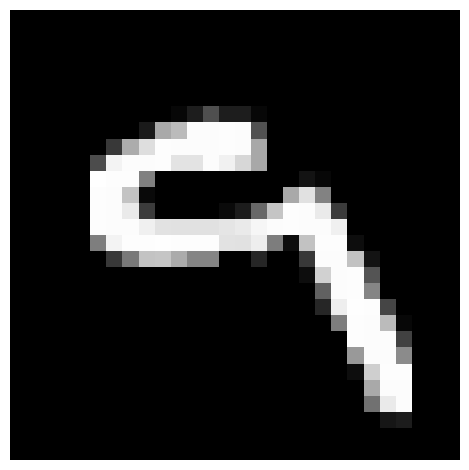

Neural Network's Prediction: [8]
Actual Train Digit Image Label: 8
Correctly Predicted Numerical Digit 8


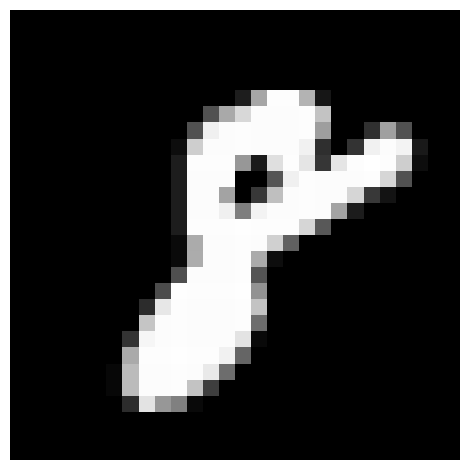

Neural Network's Prediction: [6]
Actual Train Digit Image Label: 6
Correctly Predicted Numerical Digit 6


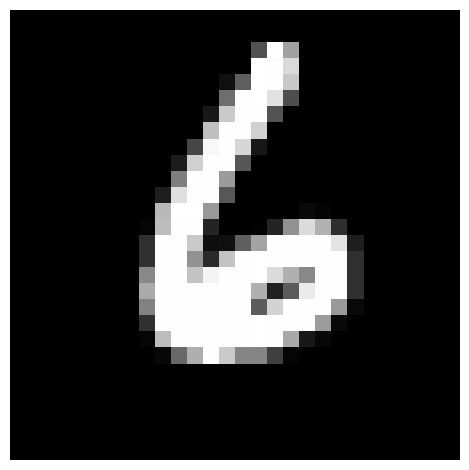

Neural Network's Prediction: [2]
Actual Train Digit Image Label: 2
Correctly Predicted Numerical Digit 2


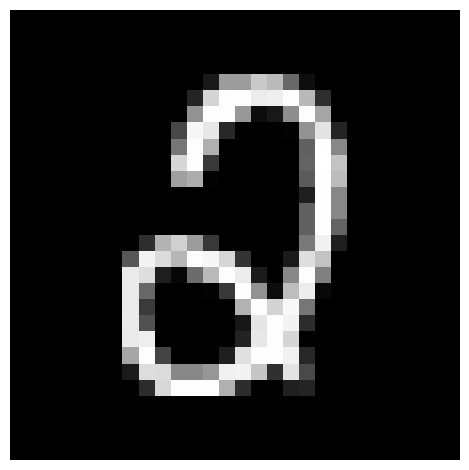

Neural Network's Prediction: [7]
Actual Train Digit Image Label: 7
Correctly Predicted Numerical Digit 7


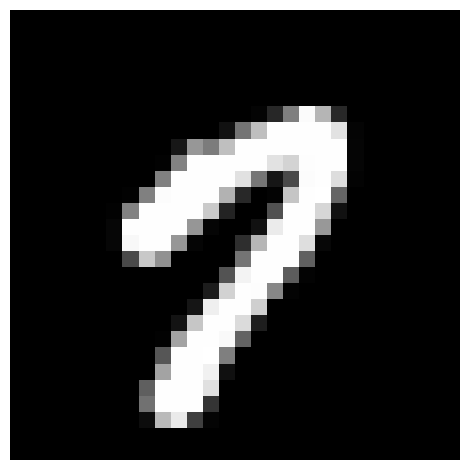

Neural Network's Prediction: [9]
Actual Train Digit Image Label: 9
Correctly Predicted Numerical Digit 9


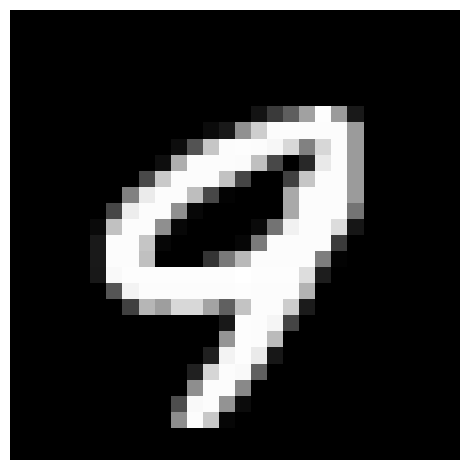

Neural Network's Prediction: [9]
Actual Train Digit Image Label: 9
Correctly Predicted Numerical Digit 9


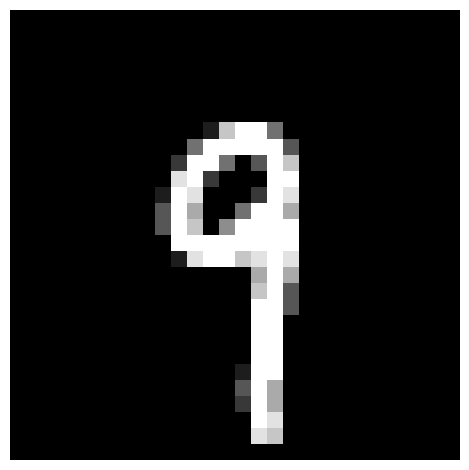

Neural Network's Prediction: [4]
Actual Train Digit Image Label: 4
Correctly Predicted Numerical Digit 4


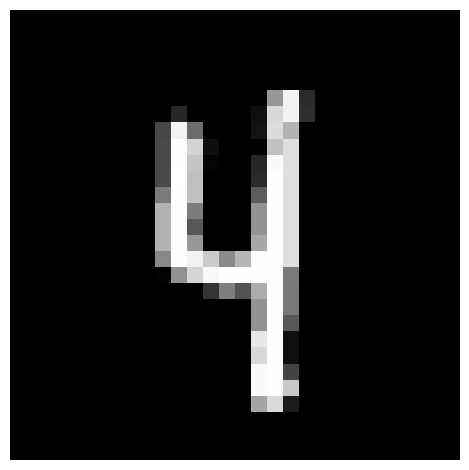

Neural Network's Prediction: [5]
Actual Train Digit Image Label: 5
Correctly Predicted Numerical Digit 5


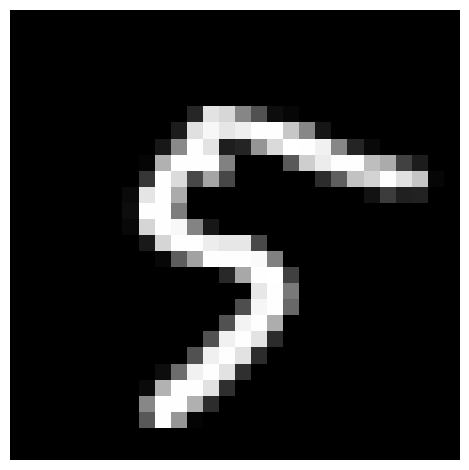

Neural Network's Prediction: [9]
Actual Train Digit Image Label: 9
Correctly Predicted Numerical Digit 9


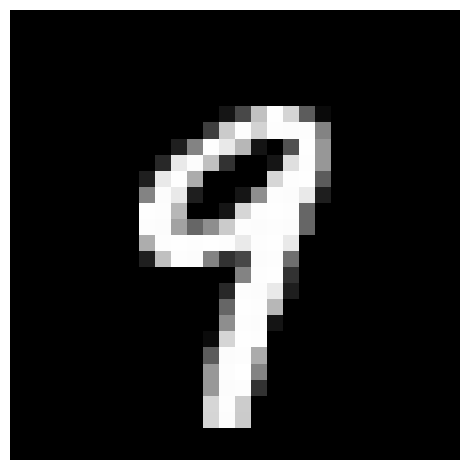

In [56]:
#test random numbers against our neural network
for i in range(10):
    guessPredictionTest(i, weight1, bias1, weight2, bias2)

### Test Neural Network Model with Test Data Set (not training data)

In [57]:
developerGuessPrediction = guessPrediction(devImages , weight1, bias1, weight2, bias2)
accuracy = fetchAccuracy(developerGuessPrediction, devLabels)
print(f"Developer Test Data Set accuracy: {accuracy}")

[8 4 9 9 9 8 3 9 2 3 1 0 9 3 7 0 3 4 7 3 7 5 8 6 2 8 9 8 7 0 8 6 8 2 3 6 3
 2 2 1 2 3 1 8 5 4 1 4 7 8 8 7 5 7 1 6 3 1 8 0 4 6 6 3 3 9 1 7 6 6 9 8 6 0
 2 9 9 7 2 9 7 5 0 7 6 1 7 3 6 3 4 5 4 8 1 5 8 6 4 6 4 1 1 7 0 6 5 0 4 4 0
 4 8 8 9 4 3 1 3 8 5 0 1 8 5 2 4 0 8 7 4 7 1 8 9 3 7 8 9 9 9 4 3 4 4 8 9 1
 2 5 8 3 7 3 4 1 1 2 1 9 4 5 1 6 0 2 7 7 4 5 1 7 3 0 4 8 9 7 6 5 0 6 3 9 5
 3 5 7 7 8 8 5 6 5 4 6 9 4 5 7 6 6 8 4 0 2 4 8 6 1 7 5 2 0 1 5 6 5 9 3 0 6
 0 9 4 0 5 0 2 6 0 4 4 1 1 4 7 2 3 5 9 1 9 6 6 2 0 0 9 7 3 2 6 0 5 3 5 2 6
 3 1 4 3 7 3 4 5 8 9 0 9 4 0 7 9 4 0 1 1 5 3 3 6 9 2 0 2 5 6 6 7 9 6 9 7 8
 2 9 1 1 6 6 2 2 4 3 9 6 3 5 1 4 9 3 4 8 0 0 1 7 5 4 6 3 2 6 8 7 3 8 0 2 8
 0 5 1 4 6 4 9 3 7 7 7 6 7 9 0 4 3 9 3 9 7 7 6 1 6 5 2 3 4 0 7 2 0 2 4 6 1
 8 4 9 0 1 6 3 4 7 8 1 5 5 6 2 0 5 4 6 7 5 6 3 7 4 5 1 0 5 5 3 9 7 3 2 5 0
 0 7 4 0 4 9 2 8 2 7 5 7 6 5 3 9 6 7 1 1 9 6 3 7 7 2 0 7 9 1 8 2 2 4 7 6 7
 8 9 6 8 7 8 4 5 8 2 1 1 6 6 4 5 2 3 6 6 3 4 3 3 8 6 8 5 7 7 0 9 7 4 9 0 7
 5 6 6 2 9 8 8 2 6 5 9 9 

In [58]:
testingData = pd.read_csv('Data/digit-recognizer/test.csv')
testingData.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
def guessPrediction(X, weight1, bias1, weight2, bias2):
    _,_,_,A2 = forwardPropagation(weight1, bias1, weight2, bias2, X)
    return fetchPredictions(A2)

def guessPredictionTest(i, weight1, bias1, weight2, bias2):
    currentDigitImage = devImages[:, i, None]
    digitImageLabel = devLabels[i]
    predictionGuess = guessPrediction(devImages[:, i, None], weight1, bias1, weight2, bias2)
    print(f"Neural Network's Prediction: {predictionGuess}")
    print(f"Actual Test Digit Image Label: {digitImageLabel}")
    if (predictionGuess == digitImageLabel):
        print(f"Correctly Predicted Numerical Digit {digitImageLabel}")
        currentDigitImage = currentDigitImage.reshape((28,28))*255#28*28 pxiel image with 0 to 255 black and white pixel
        plt.gray()
        #plt.figure(figsize=(4,4))
        plt.imshow(currentDigitImage, interpolation='nearest')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Did Not Correctly Predict Numerical Digit {digitImageLabel}!")

Neural Network's Prediction: [8]
Actual Test Digit Image Label: 8
Correctly Predicted Numerical Digit 8


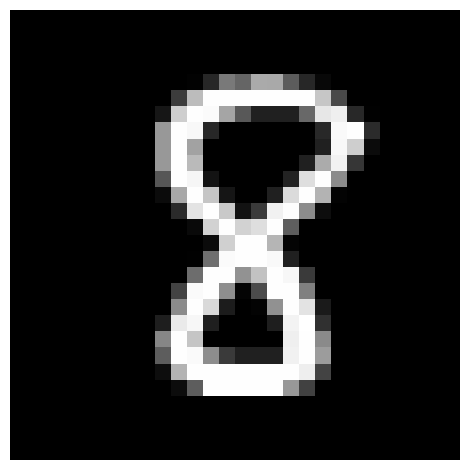

Neural Network's Prediction: [4]
Actual Test Digit Image Label: 4
Correctly Predicted Numerical Digit 4


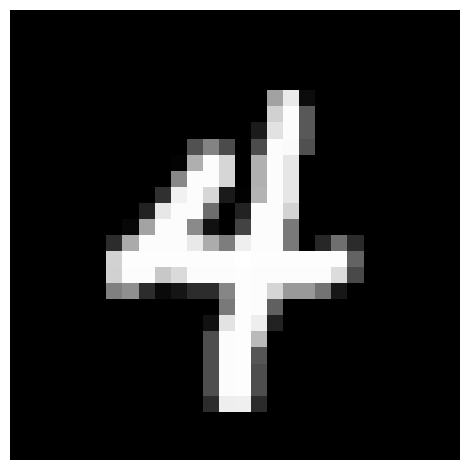

Neural Network's Prediction: [9]
Actual Test Digit Image Label: 9
Correctly Predicted Numerical Digit 9


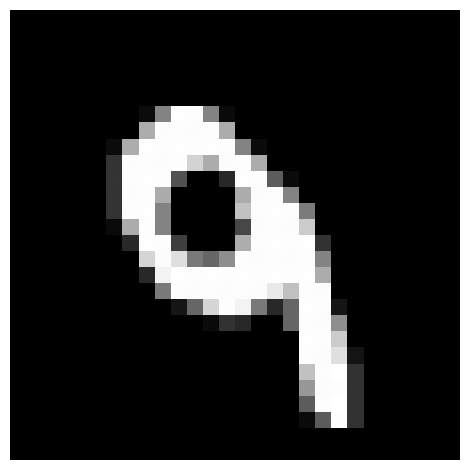

Neural Network's Prediction: [9]
Actual Test Digit Image Label: 9
Correctly Predicted Numerical Digit 9


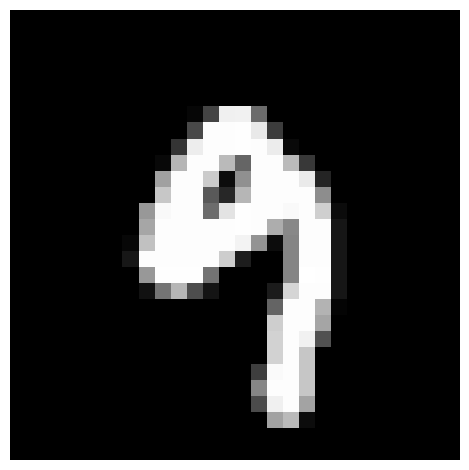

Neural Network's Prediction: [9]
Actual Test Digit Image Label: 9
Correctly Predicted Numerical Digit 9


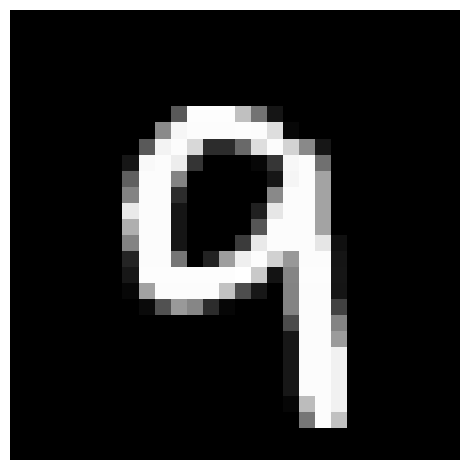

Neural Network's Prediction: [8]
Actual Test Digit Image Label: 8
Correctly Predicted Numerical Digit 8


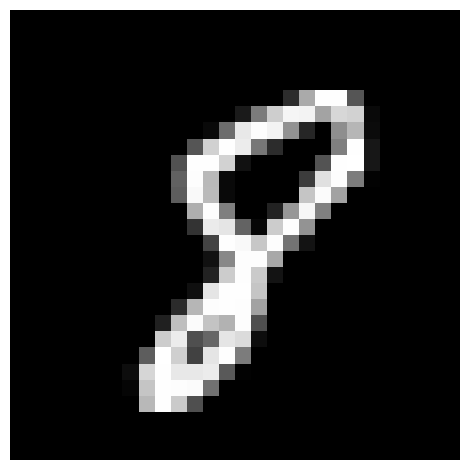

Neural Network's Prediction: [3]
Actual Test Digit Image Label: 3
Correctly Predicted Numerical Digit 3


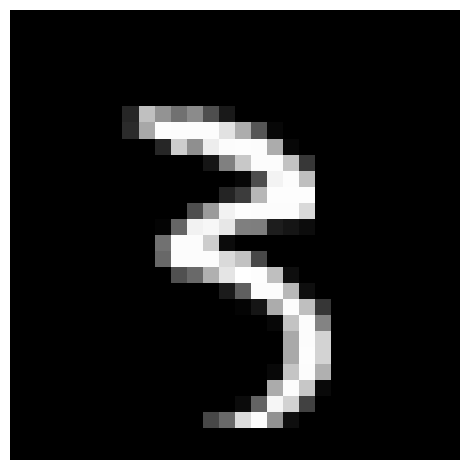

Neural Network's Prediction: [9]
Actual Test Digit Image Label: 9
Correctly Predicted Numerical Digit 9


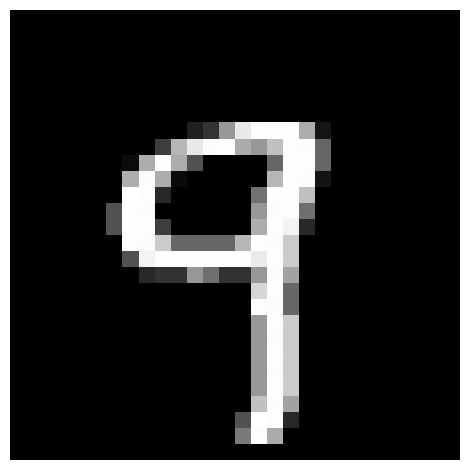

Neural Network's Prediction: [2]
Actual Test Digit Image Label: 2
Correctly Predicted Numerical Digit 2


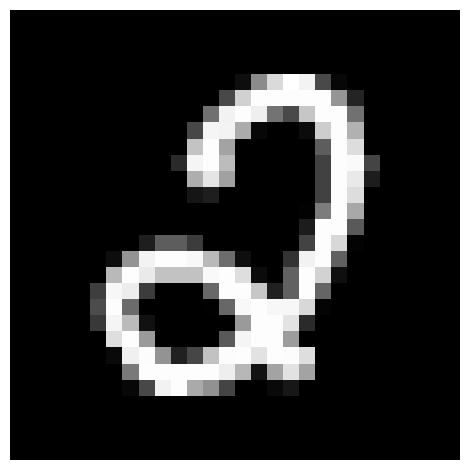

Neural Network's Prediction: [3]
Actual Test Digit Image Label: 8
Did Not Correctly Predict Numerical Digit 8!


In [60]:
#test random numbers against our neural network
for i in range(10):
    guessPredictionTest(i, weight1, bias1, weight2, bias2)